In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', 40)
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\shahd\OneDrive\Desktop\02_Dhruv Shah Academics\01_UTD Semesters\Applied Machine Learning\Python\media prediction and its cost.csv")
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,4,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [3]:
data.shape

(60428, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [5]:
data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [6]:
data.duplicated().sum()

0

In [7]:
data = data.drop_duplicates()
data = data.dropna()

In [8]:
data.shape # There are no duplicate/null records to be dropped

(60428, 40)

# EDA

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
total_children,60428.0,2.533875,1.490165,0.0000,1.00,3.0000,4.000000,5.0000
avg_cars_at home(approx),60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
num_children_at_home,60428.0,0.829351,1.303424,0.0000,0.00,0.0000,1.000000,5.0000
avg_cars_at home(approx).1,60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000


<Axes: xlabel='cost', ylabel='Density'>

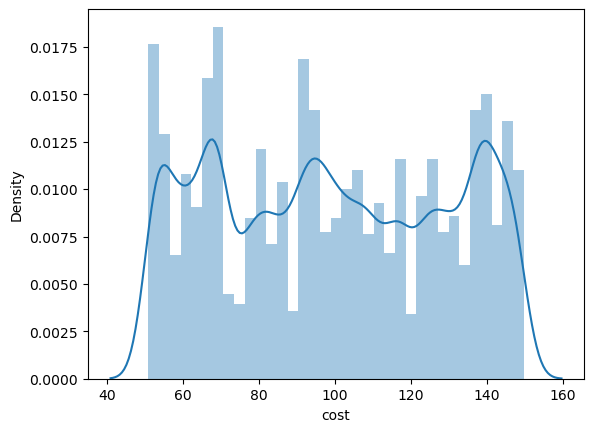

In [10]:
sns.distplot(data['cost'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24d533e7590>,
 'caps': [<matplotlib.lines.Line2D at 0x24d533fcd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d52b654d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d533fe3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d533fee10>],
 'means': []}

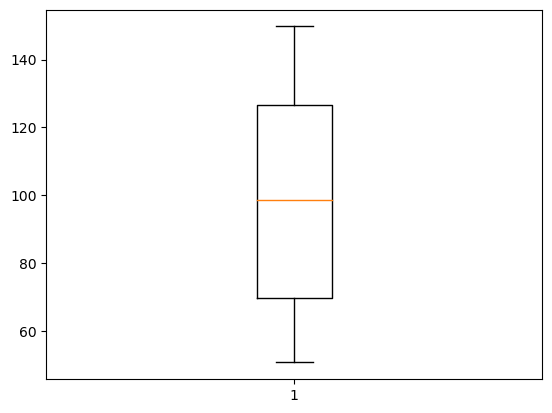

In [11]:
x1 = data['cost']

plt.boxplot(x1)

In [12]:
numeric_df = data.select_dtypes(include='number')
numeric_df.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [13]:
my_corr_matrix = numeric_df.corr()
my_corr_matrix

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.954685,0.503482,0.083313,0.004498,0.032437,0.004498,0.833478,0.036179,0.032014,0.034293,-0.006134,-0.010630,0.015543,0.010442,0.017886,0.017883,-0.029368,0.019179,0.031459,0.031459,0.030603,-0.004621
store_cost(in millions),0.954685,1.000000,0.480087,0.079058,0.002865,0.027576,0.002865,0.795880,0.034237,0.030257,0.030213,-0.005976,-0.009792,0.017877,0.012884,0.019245,0.019242,-0.027126,0.019252,0.033206,0.033206,0.030929,-0.004162
unit_sales(in millions),0.503482,0.480087,1.000000,0.163188,0.023667,0.066725,0.023667,-0.002358,0.001255,0.001137,0.001599,-0.001129,0.000084,0.031464,0.024857,0.030563,0.030557,-0.057633,0.034996,0.057878,0.057878,0.055885,-0.015015
total_children,0.083313,0.079058,0.163188,1.000000,0.098110,0.394709,0.098110,0.000545,-0.000186,0.000142,0.002794,-0.002824,0.002307,0.000555,0.018526,-0.026926,-0.026923,0.002836,-0.000591,-0.013764,-0.013764,-0.003361,-0.003900
avg_cars_at home(approx),0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,0.003725,-0.004312,-0.007265,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
num_children_at_home,0.032437,0.027576,0.066725,0.394709,0.130841,1.000000,0.130841,-0.000477,-0.002480,-0.002535,0.001380,-0.001818,0.000118,0.006150,0.025008,-0.024624,-0.024617,-0.016873,-0.013750,-0.023680,-0.023680,-0.008918,-0.002549
avg_cars_at home(approx).1,0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,0.003725,-0.004312,-0.007265,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
SRP,0.833478,0.795880,-0.002358,0.000545,-0.007921,-0.000477,-0.007921,1.000000,0.043332,0.038639,0.042013,-0.005527,-0.011951,0.001663,-0.000505,0.004375,0.004374,-0.000014,0.002031,0.002811,0.002811,0.003998,0.002082
gross_weight,0.036179,0.034237,0.001255,-0.000186,0.004588,-0.002480,0.004588,0.043332,1.000000,0.988903,0.052340,-0.033883,-0.011754,-0.005254,-0.004749,-0.004195,-0.004195,0.001933,0.002293,0.001944,0.001944,0.003109,0.001281
net_weight,0.032014,0.030257,0.001137,0.000142,0.004155,-0.002535,0.004155,0.038639,0.988903,1.000000,0.054580,-0.036211,-0.014394,-0.004374,-0.003723,-0.003843,-0.003842,0.001816,0.002551,0.002656,0.002656,0.002579,0.001343


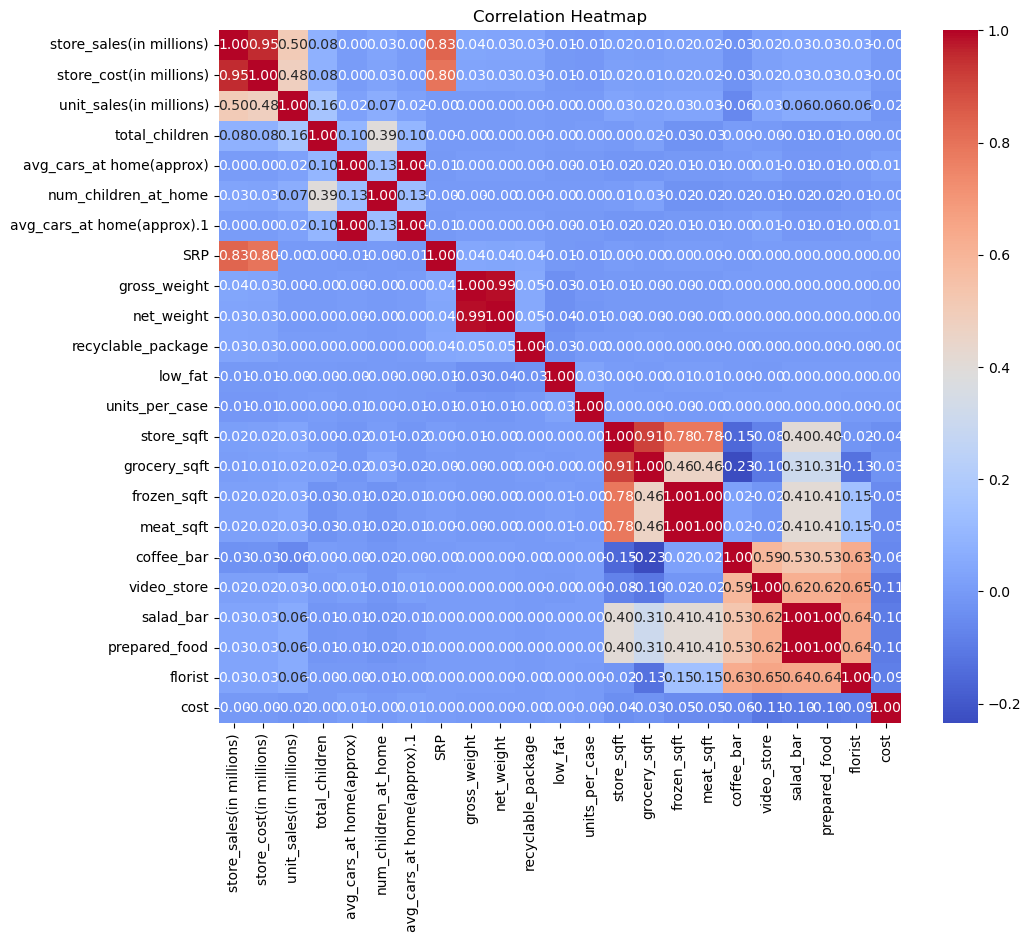

In [14]:
plt.figure(figsize=(11, 9))
sns.heatmap(my_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'store sales and store cost in millions')

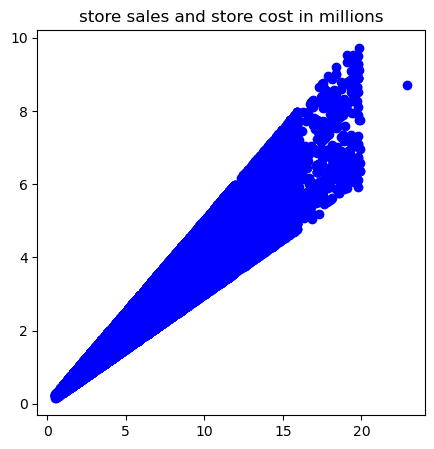

In [15]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['store_sales(in millions)'], numeric_df['store_cost(in millions)'], color='blue')
plt.title('store sales and store cost in millions')

Text(0.5, 1.0, 'store sales and SRP')

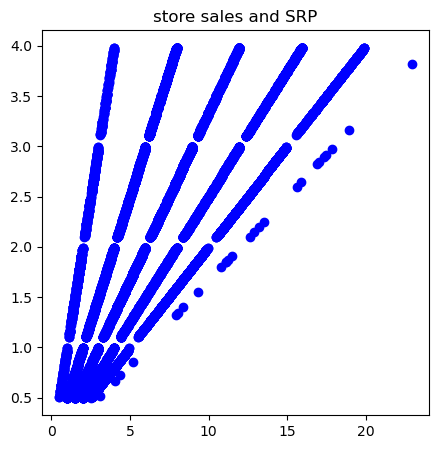

In [16]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['store_sales(in millions)'], numeric_df['SRP'], color='blue')
plt.title('store sales and SRP')

Text(0.5, 1.0, 'avg_cars_at home(approx) and avg_cars_at home(approx).1')

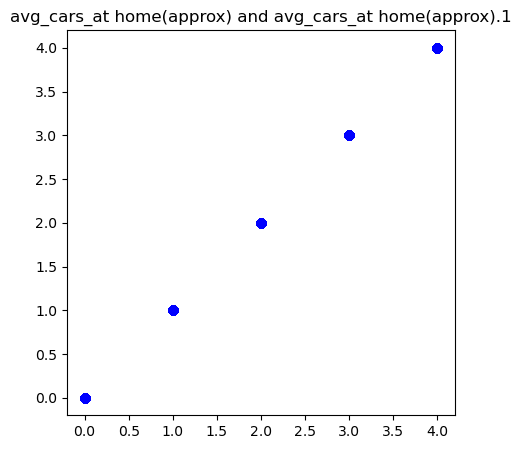

In [17]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['avg_cars_at home(approx)'], numeric_df['avg_cars_at home(approx).1'], color='blue')
plt.title('avg_cars_at home(approx) and avg_cars_at home(approx).1')

Text(0.5, 1.0, 'gross_weight and net_weight')

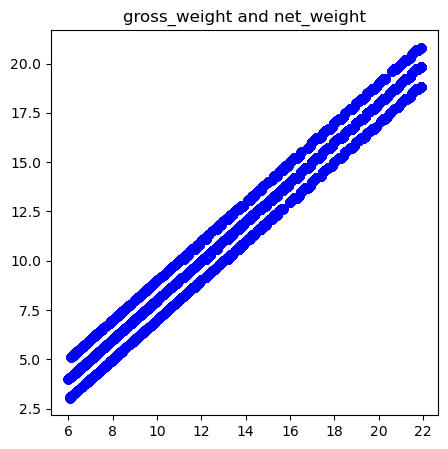

In [18]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['gross_weight'], numeric_df['net_weight'], color='blue')
plt.title('gross_weight and net_weight')

Text(0.5, 1.0, 'store_sqft and grocery_sqft')

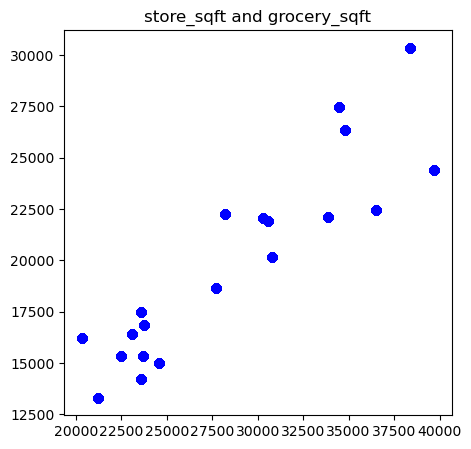

In [19]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['store_sqft'], numeric_df['grocery_sqft'], color='blue')
plt.title('store_sqft and grocery_sqft')

Text(0.5, 1.0, 'meat_sqft and frozen_sqft')

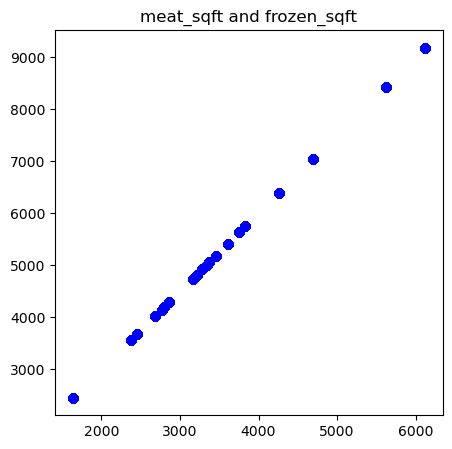

In [20]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['meat_sqft'], numeric_df['frozen_sqft'], color='blue')
plt.title('meat_sqft and frozen_sqft')

Text(0.5, 1.0, 'salad_bar and prepared_food')

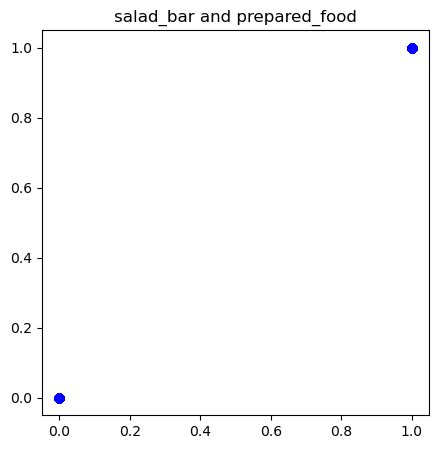

In [21]:
plt.figure(figsize=(5,5))

plt.scatter(numeric_df['salad_bar'], numeric_df['prepared_food'], color='blue')
plt.title('salad_bar and prepared_food')

# Try to add all the plots in one output cell, will need help

* The above plots depict the highly correlated variables which can help us in removing certain variables because of redundancy.
* Keeping the threshold as 0.8 and -0.8 for strong correlation, we choose to remove the following columns which may increase the
  bias slightly but will make the model simpler
  * **store_sales and store_cost** as **SRP** is correlated with both of them (0.83 and 0.80)
  * **avg_cars_at home(approx).1** (corr is 1 with avg_cars_at_home(approx))
  * **meat_sqft** (corr is 1 with frozen_sqft)
  * **gross_weight** (corr is 0.99 with net_weight)
  * **grocery_sqft** (corr is 0.91 with store_sqft)
  * **salad_bar** (corr is 1 with prepared_food)

In [22]:
data = data.drop(columns=['store_sales(in millions)', 'store_cost(in millions)', 'avg_cars_at home(approx).1', 'meat_sqft', 'gross_weight', 'salad_bar', 'grocery_sqft'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   unit_sales(in millions)   60428 non-null  int64  
 4   promotion_name            60428 non-null  object 
 5   sales_country             60428 non-null  object 
 6   marital_status            60428 non-null  object 
 7   gender                    60428 non-null  object 
 8   total_children            60428 non-null  int64  
 9   education                 60428 non-null  object 
 10  member_card               60428 non-null  object 
 11  occupation                60428 non-null  object 
 12  houseowner                60428 non-null  object 
 13  avg_cars_at home(approx)  60428 non-null  int64  
 14  avg. y

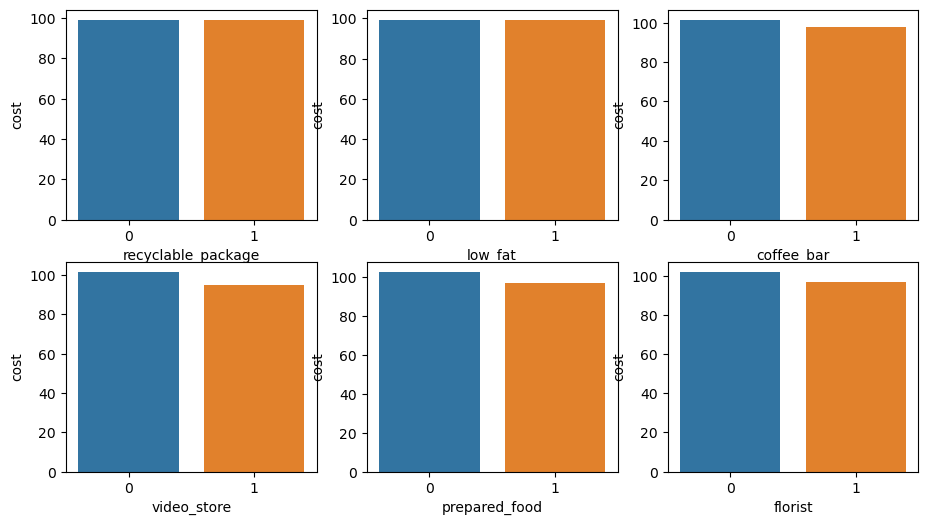

In [24]:
lst_cate = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist'] #
#------------------------------------------------------------------------------------------------------
rows = 2
columns = 3
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(11,6))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate[count])['cost'].mean().to_frame().reset_index()
                    , x=lst_cate[count], y='cost')
        count += 1

The above data is already given as binary in the dataset and it is very difficult to tell if there is significant variation across the classes in each variable. Hence we need to perform statistical testing using **T-Test**.

* **Null Hypothesis H0**: There is NO difference in lst_0 and lst_1 (avg of lst_0 == avg of lst_1)
* **Alternate Hypothesis Ha**: There is significant difference in lst_0 and lst_1 (avg of lst_0 != avg of lst_1)

In [25]:
alpha = .05
for i in lst_cate:
    lst_0 = data.cost[data[i] == 0]
    lst_1 = data.cost[data[i] == 1]
    t, p = ttest_ind(lst_0, lst_1, equal_var = False)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => there are differences across', i, 'categories', 'and cost')
    else:
        print('p > alpha => failed to reject H0 => there are NO differences across', i, 'categories', 'and cost')
    print('\n')

p-value = 0.67, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences across recyclable_package categories and cost


p-value = 0.30, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences across low_fat categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across coffee_bar categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across video_store categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across prepared_food categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across florist categories and cost




From this it is clear that we can drop **recyclable_package** and **low_fat**

In [26]:
data = data.drop(columns=['recyclable_package', 'low_fat'])

In [27]:
data.shape

(60428, 31)

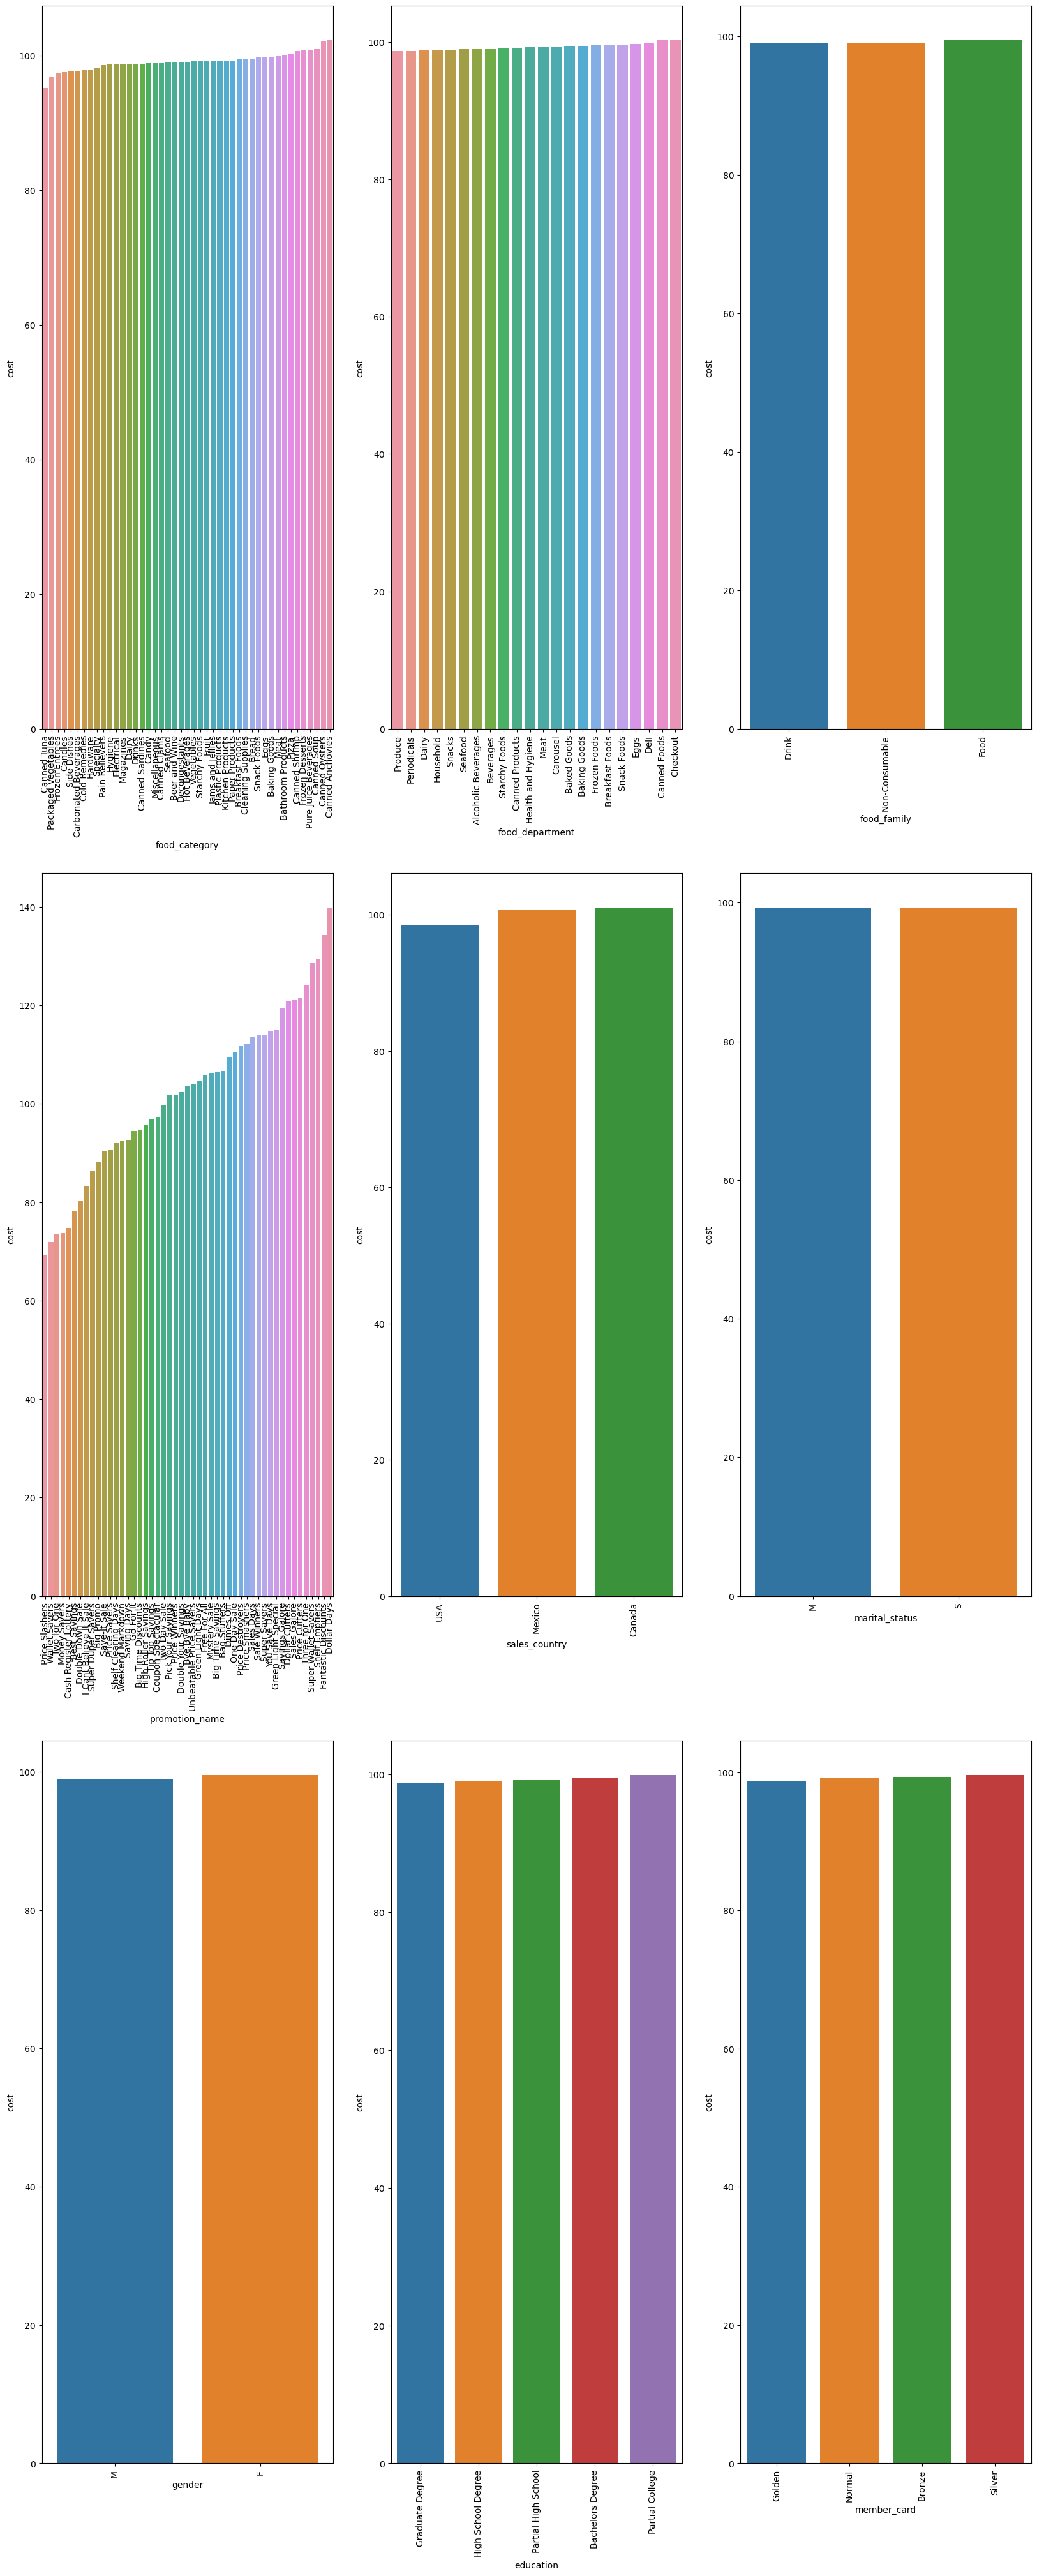

In [28]:
lst_cate_column = []
for column in data.columns:
    if (data[column].dtype == 'O'):
        lst_cate_column.append(column)
#----------------------------------------------------------------
rows = 3
columns = 3
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(20,50))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate_column[count]
                                                   )['cost'].mean().sort_values().to_frame().reset_index()
                    , x=lst_cate_column[count], y='cost')
        axs[i, j].tick_params(axis='x', rotation=90)
        count += 1

In [29]:
data = data.drop(columns=['food_category', 'food_department', 'food_family', 'gender', 'marital_status',
                          'brand_name', 'avg. yearly_income', 'education', 'member_card', 'houseowner', 
                           'sales_country', 'occupation'])

In [30]:
data.shape

(60428, 19)

In [31]:
data.head()

,unit_sales(in millions),promotion_name,total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,store_type,store_city,store_state,store_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,4,Bag Stuffers,1,1,1,1.84,17.70,17,Deluxe Supermarket,Salem,OR,27694,5415,1,1,1,1,"Daily Paper, Radio",126.62
1,3,Cash Register Lottery,0,4,0,1.84,17.70,17,Deluxe Supermarket,Salem,OR,27694,5415,1,1,1,1,"Daily Paper, Radio",59.86
2,2,High Roller Savings,4,1,0,1.84,17.70,17,Deluxe Supermarket,Salem,OR,27694,5415,1,1,1,1,"Daily Paper, Radio",84.16
3,2,Cash Register Lottery,2,2,2,1.84,17.70,17,Deluxe Supermarket,Salem,OR,27694,5415,1,1,1,1,In-Store Coupon,95.78
4,3,Double Down Sale,0,2,0,1.36,5.11,29,Deluxe Supermarket,Salem,OR,27694,5415,1,1,1,1,Radio,50.79


In [32]:
encoded_data = pd.get_dummies(data,columns=['promotion_name','store_type', 'store_city', 
                                            'store_state','media_type'],drop_first=True)
encoded_data = encoded_data.astype(int)

In [33]:
# encoded_data.to_csv('encoded_data.csv', index=False)
encoded_data

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,store_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,cost,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,...,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,4,1,1,1,1,17,17,27694,5415,1,1,1,1,126,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3,0,4,0,1,17,17,27694,5415,1,1,1,1,59,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,4,1,0,1,17,17,27694,5415,1,1,1,1,84,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,2,2,2,1,17,17,27694,5415,1,1,1,1,95,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,0,2,0,1,5,29,27694,5415,1,1,1,1,50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,1,1,1,1,2,18,26,22478,4294,1,0,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
60424,1,2,2,0,1,15,36,22478,4294,1,0,0,0,69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
60425,2,1,3,0,2,18,26,22478,4294,1,0,0,0,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
60426,3,2,4,0,2,18,26,34452,4193,1,0,0,1,132,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
y = encoded_data['cost']
x = encoded_data.drop(['cost'],axis=1)

In [35]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [36]:
# show number of rows in the training set and the complete set

print("Obs. in training:", X_train.shape[0])
print("Obs. in full sample:", x.shape[0])

Obs. in training: 42299
Obs. in full sample: 60428


In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42299, 104) (18129, 104) (42299,) (18129,)


# Model building

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression() # inside "model": method to get beta from your inputs

In [39]:
# Train the model using the training set

LR_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict y for the test set

y_pred_test = LR_model.predict(X_test)

In [41]:
# MSE
e = y_test - y_pred_test
MSE_test = np.mean(e**2) # the mean of error squares
print(MSE_test)

# RMSE: Square Root of MSE
print(MSE_test**0.5)  
# y_test

573.3406740012533
23.94453328008824


In [42]:
LR_model.score(X_train, y_train)

0.3504093540826353

In [43]:
print("Accuracy of LR model is: ", LR_model.score(X_test, y_test)*100, "%")

Accuracy of LR model is:  36.579796799313904 %


In [ ]:
# linear regression feature importance
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

## Ridge Regression

In [44]:
# Model and prediction
from sklearn.linear_model import Ridge
ridge_base = Ridge(alpha = 1)
ridge_base.fit(X_train, y_train)

Ridge(alpha=1)

In [45]:
# Predict y for the test set

y_pred_test = ridge_base.predict(X_test)

In [46]:
# MSE
e = y_test - y_pred_test
MSE_test = np.mean(e**2) # the mean of error squares
print(MSE_test)

# RMSE: Square Root of MSE
print(MSE_test**0.5)  
# y_test

573.4496354647086
23.94680846093501


In [47]:
ridge_base.score(X_train, y_train)

0.3503909330387386

In [48]:
print("Accuracy of Ridge model is: ", ridge_base.score(X_test, y_test)*100, "%")

Accuracy of Ridge model is:  36.56774400336423 %


In [49]:
## Grid Search with CV, to find the best alpha


# 1. Define function 
ridge = Ridge()

# 2. Define a list of parameters (key is 'alpha')
param_grid = {  'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]  }

# 3. Initiate GridSearchCV
grid_ridge = GridSearchCV(ridge, param_grid, cv = 5)

# 4. Fit the data
grid_ridge.fit(X_train, y_train)



# 4.1 Present performance measure
## unbiased measure in R2
print(grid_ridge.score(X_test, y_test))

## mean validation score of best model, average R2 on the five validation sets
print(grid_ridge.best_score_)

# 4.2 find best hyperparameters
print(grid_ridge.best_params_)

# 4.3 find best parameter estimates
print(grid_ridge.best_estimator_.coef_)
print(grid_ridge.best_estimator_.intercept_)

0.36578696920914033
0.3475986058520741
{'alpha': 0.1}
[ 1.25274850e-02 -3.17843945e-02  5.39708012e-01  5.49129291e-03
  3.03309715e-02  1.70609385e-02 -3.05742359e-03 -4.34710322e-04
  2.58252788e-04 -3.86970073e+00 -3.67700429e+00  2.29406416e-01
 -2.72368775e+00 -3.79536553e+01 -3.21643071e+01 -1.95579655e+01
  8.33368221e-01 -1.72799237e+01 -3.01046888e+01 -2.08261938e+01
 -1.02714696e+00  3.76798717e+00  2.64906367e+01 -3.43203415e+01
 -1.74418491e+01  2.25073524e+01 -1.27600773e+01 -1.88024430e+01
 -1.31140173e+01 -6.86071114e-01 -1.50459267e+01 -2.77673564e+01
 -4.37965618e+01 -7.73136035e+00  3.23639789e-01 -1.16012278e+01
 -6.12680729e+00 -1.05397436e+01 -3.20564330e+01 -5.47898292e+01
 -1.39978923e+01 -1.42667672e+01  8.35206582e+00  9.14918309e+00
  1.10465926e+01 -1.81773794e+01 -2.56019625e+01 -4.94911627e+00
 -2.24192150e+01  1.62124711e+01 -3.23681584e+01 -1.21998189e+01
 -2.00666243e+00  7.12780793e+00 -1.27347138e+01 -1.52475133e+01
 -4.04171762e+01 -1.17410299e+01 -4.

## Lasso Regression

In [50]:
# Model and prediction with default hyperparameter
from sklearn.linear_model import Lasso
lasso_base = Lasso(alpha = 1)
lasso_base.fit(X_train, y_train)

Lasso(alpha=1)

In [51]:
# Predict y for the test set

y_pred_test = lasso_base.predict(X_test)

In [52]:
# MSE
e = y_test - y_pred_test
MSE_test = np.mean(e**2) # the mean of error squares
print(MSE_test)

# RMSE: Square Root of MSE
print(MSE_test**0.5)  
# y_test

889.761563970032
29.828871315724165


In [53]:
lasso_base.score(X_train, y_train)

0.015101218668162275

In [54]:
print("Accuracy of Lasso model is: ", lasso_base.score(X_test, y_test)*100, "%")

Accuracy of Lasso model is:  1.5788313197253823 %


In [55]:
# Grid Search with CV - LASSO Case


# 1. Define a list of parameters (key is 'alpha')
param_grid = {  'alpha' :  [0.001, 0.01, 0.1, 1, 10, 100] }

# 2. Define function and fit the data
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv = 5)

grid_lasso.fit(X_train, y_train)

# 3.1 Present performance measure
## unbiased measure in R2
print(grid_lasso.score(X_test, y_test))

## mean validation score of best model
print("Accuracy of Lasso model with CV is: ", grid_lasso.best_score_*100, "%")

# 3.2 find best hyperparameters
print(grid_lasso.best_params_)

# 3.3 find best parameter estimates
print(grid_lasso.best_estimator_.coef_)
print(grid_lasso.best_estimator_.intercept_)

0.36560236659057876
Accuracy of Lasso model with CV is:  34.75568357650035 %
{'alpha': 0.001}
[ 1.33420206e-02 -3.13546296e-02  5.37395055e-01  4.73035083e-03
  2.93562247e-02  1.70186873e-02 -3.11210565e-03 -5.36428362e-04
  2.80193356e-04 -1.33106084e+00 -4.81407893e+00  0.00000000e+00
 -2.35644895e+00 -3.63016307e+01 -3.05148651e+01 -1.80290263e+01
  2.18611899e+00 -1.55873941e+01 -2.89004917e+01 -1.90952742e+01
  4.73992816e-01  5.25284650e+00  2.78188613e+01 -3.27799472e+01
 -1.55773186e+01  2.38035435e+01 -1.11997465e+01 -1.72734110e+01
 -1.15439890e+01  6.75091035e-01 -1.35472413e+01 -2.63674492e+01
 -4.21599505e+01 -6.14223629e+00  1.80732666e+00 -9.92403060e+00
 -4.47940661e+00 -8.90548293e+00 -3.04937802e+01 -5.31900345e+01
 -1.22819988e+01 -1.26871330e+01  9.77834578e+00  1.05023192e+01
  1.24549869e+01 -1.66797831e+01 -2.40307758e+01 -3.28244778e+00
 -2.08256252e+01  1.76257764e+01 -3.08129391e+01 -1.05546790e+01
 -2.72181608e-01  8.63474245e+00 -1.12696803e+01 -1.36471692e

## Decision Tree Regressor

In [56]:
# Initialize the decision tree regressor model
dtr_model = DecisionTreeRegressor()

In [57]:
# Train the model on the training data
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
# Predict y for the test set

y_pred_test = dtr_model.predict(X_test)

In [59]:
# MSE
e = y_test - y_pred_test
MSE_test = np.mean(e**2) # the mean of error squares
print(MSE_test)

# RMSE: Square Root of MSE
print(MSE_test**0.5)  
# y_test

2.3753654365933037
1.5412220594688177


In [60]:
dtr_model.score(X_train, y_train)

1.0

In [61]:
print("Accuracy of DTR model is: ", dtr_model.score(X_test, y_test)*100, "%")

Accuracy of DTR model is:  99.73724843623374 %


In [93]:
feature_importances = dtr_model.feature_importances_

from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(dtr_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and standard deviations
feature_importances = perm_importance.importances_mean
feature_importance_std = perm_importance.importances_std

# Create a DataFrame with feature names, importances, and standard deviations
perm_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances, 'Importance_Std': feature_importance_std})

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(perm_importance_df)

                             Feature  Importance  Importance_Std
7                         store_sqft    0.715020        0.012289
92  media_type_Cash Register Handout    0.266940        0.004850
99         media_type_Street Handout    0.264919        0.007492
8                        frozen_sqft    0.250197        0.004670
94     media_type_Daily Paper, Radio    0.199348        0.002689
..                               ...         ...             ...
84                    store_state_DF    0.000000        0.000000
74                store_city_Orizaba    0.000000        0.000000
0            unit_sales(in millions)   -0.000042        0.000146
5                         net_weight   -0.000150        0.000091
6                     units_per_case   -0.000212        0.000237

[104 rows x 3 columns]


## Polynomial Regression

In [62]:
### In below, use make_pipeline for practice
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# S1. Define models - two models, polynomial transfer first, then linear regression 
poly_transfer = PolynomialFeatures(degree = 2) # initiate feature generator
my_lr = LinearRegression() # initiate estimator

In [81]:
X_poly = poly_transfer.fit_transform(X_train)

In [63]:
# S2. Apply polynomial regression in pipeline
my_poly_reg = make_pipeline(poly_transfer, my_lr)
my_poly_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [64]:
# generate polynomial terms for X_train -> regress y on the generated variables
# S3. Predict and get mse
y_poly_test_pred = my_poly_reg.predict(X_test)
y_poly_train_pred = my_poly_reg.predict(X_train)
# generate polynomial terms for X_test -> predict y for generated variables

In [65]:
e = y_test - y_poly_test_pred
MSE = np.mean(e**2)
MSE

1.8219721666665414

In [66]:
m = y_train - y_poly_train_pred
MSE = np.mean(m**2)
MSE

1.7919577186799576

In [67]:
MSE_poly = np.mean((y_test - y_poly_test_pred)**2)
print(MSE_poly, MSE)

1.8219721666665414 1.7919577186799576


In [68]:
my_poly_reg.score(X_train, y_train)

0.9980071182157652

In [69]:
my_poly_reg.score(X_test, y_test)
print("Accuracy of Polynomial Regression model is: ", my_poly_reg.score(X_test, y_test)*100, "%")

Accuracy of Polynomial Regression model is:  99.79846215299956 %


In [84]:
# from sklearn.preprocessing import PolynomialFeatures
# # Feature selection
# selector = SelectFromModel(estimator=my_poly_reg, threshold=-np.inf, max_features=5)